In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 

sns.set(style="whitegrid")

file_path = r'C:\Users\Zaur\OneDrive\Desktop\Crime_Data_from_2020_to_Present.csv'
crime_data = pd.read_csv(file_path)


print(crime_data.shape)        # Check the dimensions of the dataset





(752911, 28)


In [10]:
print(crime_data.columns)      # Check column names


Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')


In [11]:
print(crime_data.head())       # Preview the first few rows


       DR_NO               Date Rptd                DATE OCC  TIME OCC  AREA  \
0   10304468  01/08/2020 12:00:00 AM  01/08/2020 12:00:00 AM      2230     3   
1  190101086  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM       330     1   
2  200110444  04/14/2020 12:00:00 AM  02/13/2020 12:00:00 AM      1200     1   
3  191501505  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM      1730    15   
4  191921269  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM       415    19   

     AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0    Southwest          377         2     624   
1      Central          163         2     624   
2      Central          155         2     845   
3  N Hollywood         1543         2     745   
4      Mission         1998         2     740   

                                         Crm Cd Desc  ... Status  \
0                           BATTERY - SIMPLE ASSAULT  ...     AO   
1                           BATTERY - SIMPLE ASSAULT  ...     IC   
2          SEX OFFEN

In [12]:
print(crime_data.info())       # Detailed information about columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752911 entries, 0 to 752910
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           752911 non-null  int64  
 1   Date Rptd       752911 non-null  object 
 2   DATE OCC        752911 non-null  object 
 3   TIME OCC        752911 non-null  int64  
 4   AREA            752911 non-null  int64  
 5   AREA NAME       752911 non-null  object 
 6   Rpt Dist No     752911 non-null  int64  
 7   Part 1-2        752911 non-null  int64  
 8   Crm Cd          752911 non-null  int64  
 9   Crm Cd Desc     752911 non-null  object 
 10  Mocodes         649650 non-null  object 
 11  Vict Age        752911 non-null  int64  
 12  Vict Sex        654681 non-null  object 
 13  Vict Descent    654675 non-null  object 
 14  Premis Cd       752902 non-null  float64
 15  Premis Desc     752476 non-null  object 
 16  Weapon Used Cd  261472 non-null  float64
 17  Weapon Des

In [13]:
print(crime_data.describe())

              DR_NO       TIME OCC           AREA    Rpt Dist No  \
count  7.529110e+05  752911.000000  752911.000000  752911.000000   
mean   2.147860e+08    1334.819522      10.717709    1118.176904   
std    1.028819e+07     653.789438       6.092023     609.213814   
min    8.170000e+02       1.000000       1.000000     101.000000   
25%    2.021116e+08     900.000000       6.000000     622.000000   
50%    2.119101e+08    1415.000000      11.000000    1142.000000   
75%    2.215044e+08    1900.000000      16.000000    1618.000000   
max    2.399165e+08    2359.000000      21.000000    2199.000000   

            Part 1-2         Crm Cd       Vict Age      Premis Cd  \
count  752911.000000  752911.000000  752911.000000  752902.000000   
mean        1.415733     500.887534      29.917438     305.961031   
std         0.492848     207.980041      21.730057     216.813311   
min         1.000000     110.000000      -2.000000     101.000000   
25%         1.000000     331.000000      1

In [19]:
# Check for missing values
print(crime_data.isnull().sum())

# Drop duplicates 
crime_data.drop_duplicates(inplace=True)



DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           103261
Vict Age               0
Vict Sex           98230
Vict Descent       98236
Premis Cd              9
Premis Desc          435
Weapon Used Cd    491439
Weapon Desc       491439
Status                 0
Status Desc            0
Crm Cd 1              10
Crm Cd 2          697204
Crm Cd 3          751044
Crm Cd 4          752855
LOCATION               0
Cross Street      631859
LAT                    0
LON                    0
dtype: int64


In [22]:
value_counts = crime_data['AREA NAME'].value_counts()

print(value_counts)

mean_value = value_counts.mean()
print(f"Mean value of area counts: {int(mean_value)}")

Central        50499
77th Street    47682
Pacific        43880
Southwest      42061
Hollywood      40184
Southeast      38577
Olympic        38197
N Hollywood    37474
Newton         37430
Wilshire       35550
Rampart        35013
West LA        34615
Northeast      32582
Van Nuys       31941
West Valley    31514
Harbor         31183
Devonshire     30489
Topanga        30481
Mission        29939
Hollenbeck     28311
Foothill       25309
Name: AREA NAME, dtype: int64
Mean value of area counts: 35852


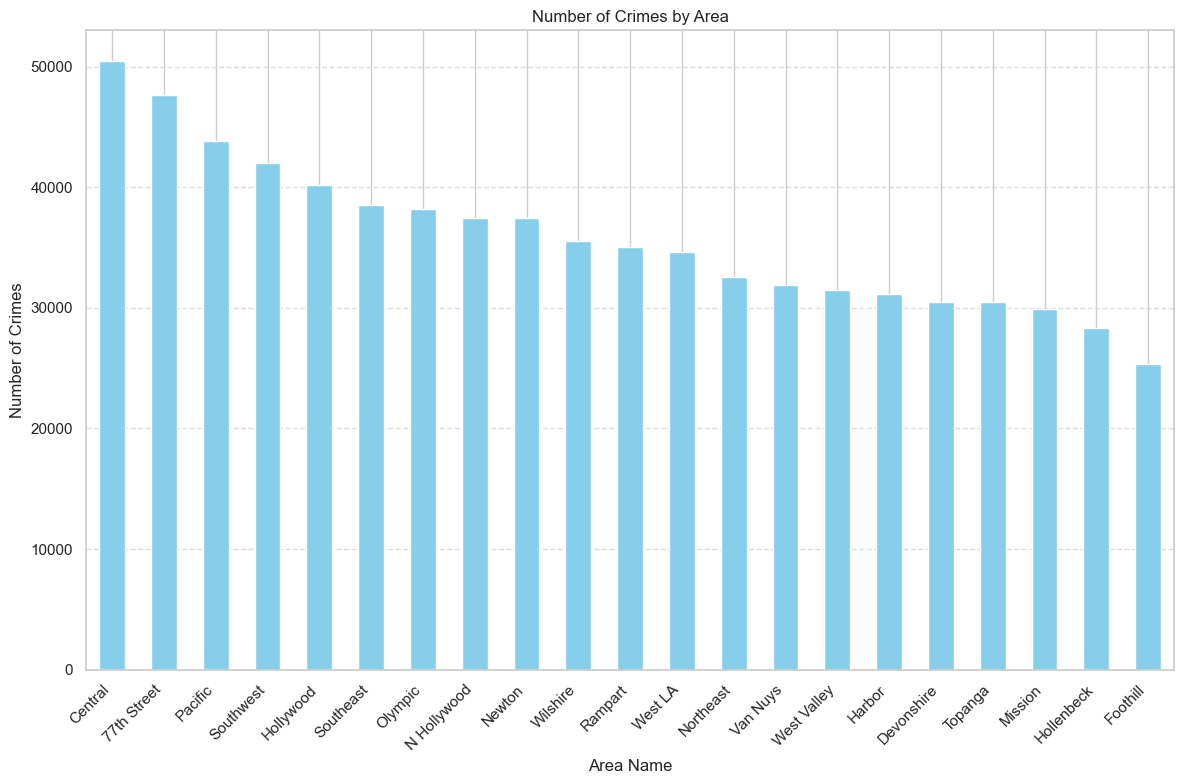

In [23]:
plt.figure(figsize=(12, 8))
value_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Crimes by Area')
plt.xlabel('Area Name')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  
plt.show()

([<matplotlib.patches.Wedge at 0x1b10f09aa90>,
 [Text(-0.7672811979481307, -0.7882128921016718, 'M'),
  Text(0.9707834002856344, 0.5172809582130992, 'F'),
  Text(-0.587073284210087, 0.9302391944907411, 'X'),
  Text(-0.8423501671305812, 0.70742221900014, 'H'),
  Text(-0.8426454308568627, 0.7070704900192429, '-')],
 [Text(-0.4185170170626167, -0.42993430478273004, '47.7%'),
  Text(0.5295182183376187, 0.28215324993441765, '42.5%'),
  Text(-0.3202217913873201, 0.5074031969949496, '9.8%'),
  Text(-0.4594637275257715, 0.3858666649091672, '0.0%'),
  Text(-0.4596247804673796, 0.3856748127377689, '0.0%')])

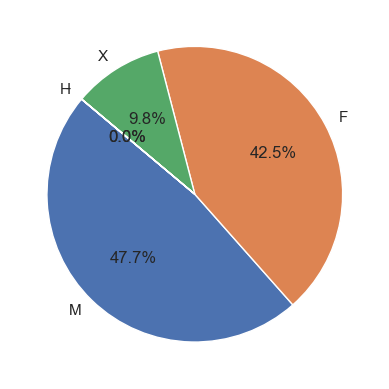

In [25]:
fig_2 = plt.figure('Plot_2') 
ax2 = fig_2.add_subplot()     
plt.pie(crime_data['Vict Sex'].value_counts(), labels=crime_data['Vict Sex'].value_counts().index, autopct='%1.1f%%', startangle=140)  

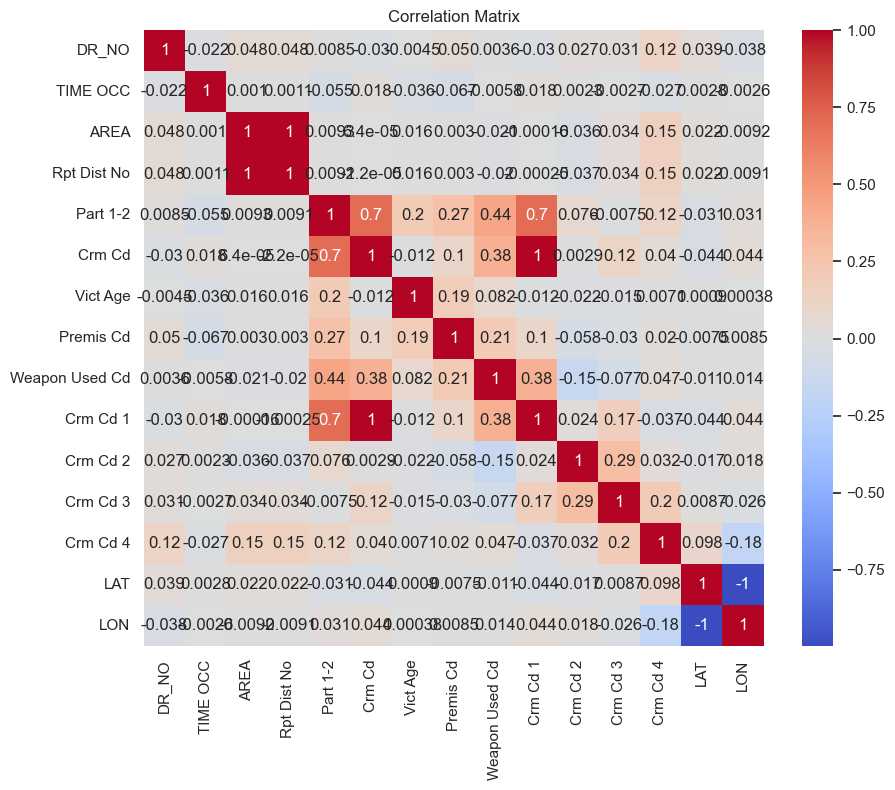

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = crime_data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [39]:
import pandas as pd
rows_with_zero_age = crime_data[crime_data['Vict Age'] == 0]
crime_data_cleaned = crime_data[crime_data['Vict Age'] != 0]




2      334
3      389
4      407
5      461
6      453
      ... 
96      74
97      57
98      57
99     285
120      1
Name: Vict Age, Length: 99, dtype: int64


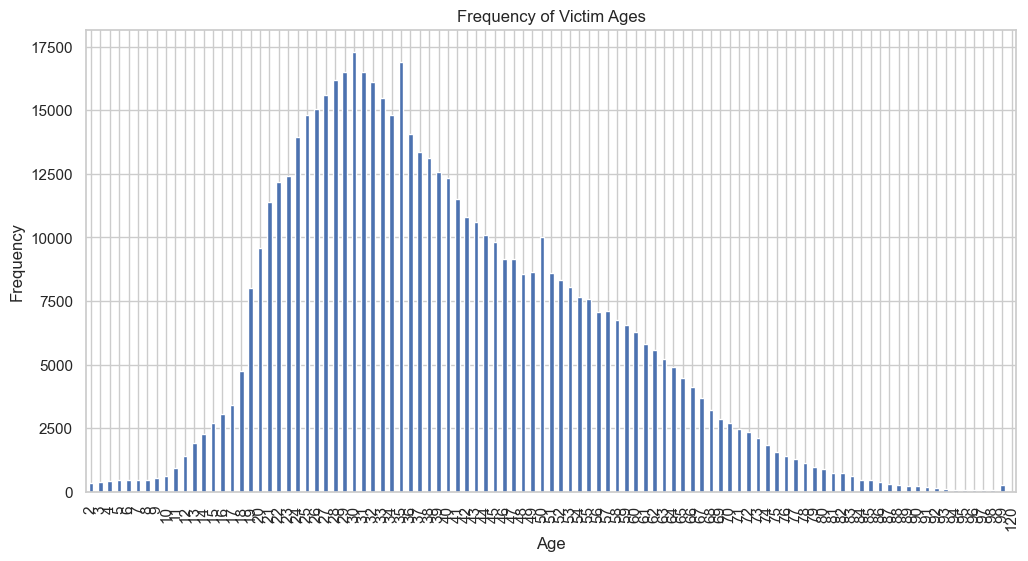

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

filtered_data = crime_data[crime_data['Vict Age'] > 0]


victim_age_counts = filtered_data['Vict Age'].value_counts().sort_index()

print(victim_age_counts)

ax = victim_age_counts.plot(kind='bar', figsize=(12, 6), title='Frequency of Victim Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



In [44]:
crime_data['Vict Age'].describe()

count    752911.000000
mean         29.917438
std          21.730057
min          -2.000000
25%          11.000000
50%          31.000000
75%          45.000000
max         120.000000
Name: Vict Age, dtype: float64

In [45]:
pip install folium pandas



     ------------------------------------ 108.4/108.4 kB 525.0 kB/s eta 0:00:00
     ---------------------------------------- 85.1/85.1 kB 1.6 MB/s eta 0:00:00
     -------------------------------------- 133.3/133.3 kB 2.0 MB/s eta 0:00:00
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.11.1 requires ruamel-yaml, which is not installed.


In [94]:
import pandas as pd

import folium
from folium import plugins

la_longitude = -118.2426
la_latitude = 34.0549

crime_data = pd.read_csv('C:/Users/Zaur/OneDrive/Desktop/Crime_Data_from_2020_to_Present.csv')


la_map = folium.Map(location=[la_latitude, la_longitude], zoom_start=11)

incidents = folium.map.FeatureGroup()


for lat, lng in zip(crime_data['LAT'].head(500), crime_data['LON'].head(500)):  # Limiting to 500 rows
    incidents.add_child(
        folium.vector_layers.CircleMarker(
            [lat, lng],
            radius=4.0,
            color='gray',
            fill=True,
            fill_color='red',
            fill_opacity=1.0
        )
    )


la_map.add_child(incidents)


la_map

In [60]:
crime_counts = crime_data['Crm Cd Desc'].value_counts()

# Get the top 10 crime types
top_10_crimes = crime_counts.head(10)

print(top_10_crimes)

VEHICLE - STOLEN                                           80439
BATTERY - SIMPLE ASSAULT                                   59630
THEFT OF IDENTITY                                          48645
BURGLARY FROM VEHICLE                                      46526
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    46157
BURGLARY                                                   45717
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT             43149
THEFT PLAIN - PETTY ($950 & UNDER)                         38510
INTIMATE PARTNER - SIMPLE ASSAULT                          37947
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)            29310
Name: Crm Cd Desc, dtype: int64


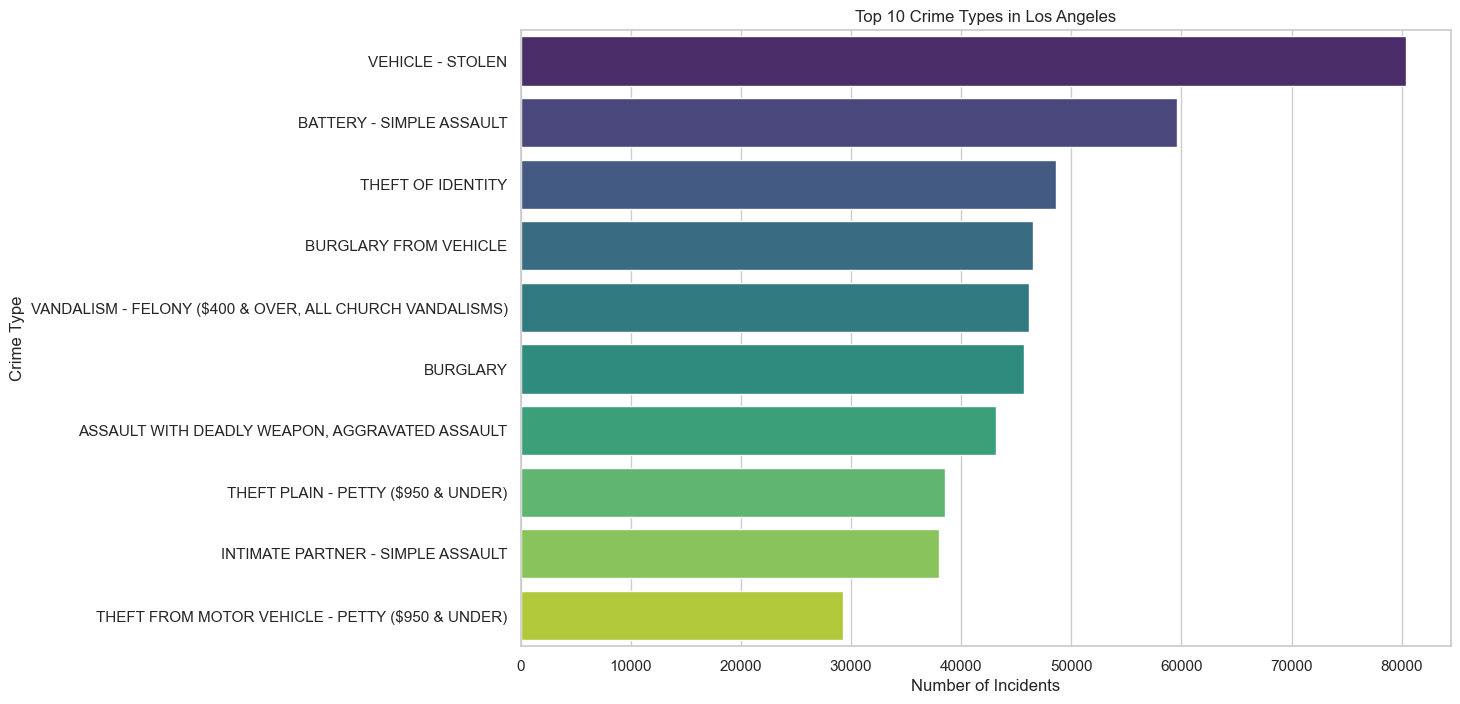

In [61]:
top_10_df = top_10_crimes.reset_index()
top_10_df.columns = ['Crime Type', 'Count']

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Crime Type', data=top_10_df, palette='viridis')
plt.title('Top 10 Crime Types in Los Angeles')
plt.xlabel('Number of Incidents')
plt.ylabel('Crime Type')
plt.show()

In [69]:
crime_by_status = crime_data['Status'].value_counts()

# Reset index for plotting
crime_by_status_df = crime_by_status.reset_index()
crime_by_status_df.columns = ['Status', 'Count']

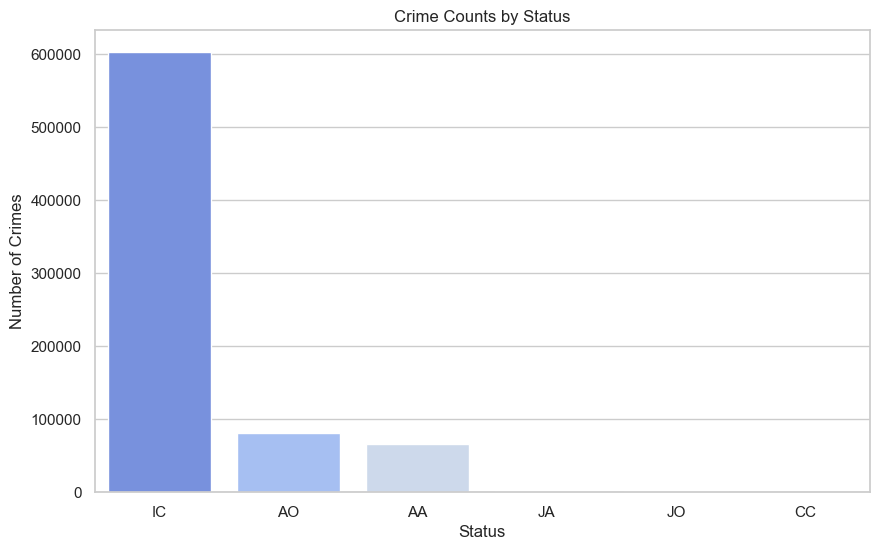

In [73]:
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Status', y='Count', data=crime_by_status_df, palette='coolwarm')
plt.title('Crime Counts by Status')
plt.xlabel('Status')
plt.ylabel('Number of Crimes')
plt.show()